# Bike Sharing - Assignment

From the given data set, understand what factors are affecting the demand for shared bikes.

**Problem Statement**

Identify which variables are significant in predicting demand for the shared bikes





### Part 1 - To start with, import all the needed packages in the start of execution only. 

In [110]:
#import the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

### Part 2 - Set few of the options needed for getting a better display on the output

Using pandas do load the given CSV file which is size ~57 KB.
 

In [111]:
# Set few options for Dataframe which will be helpfull in viewing the output
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('expand_frame_repr', True)
#Check the datatypes of all the columns of the dataframe
bikesharing = pd.read_csv('day.csv')
bikesharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [112]:
#Get the total number of rows and columns  present
bikesharing.shape

(730, 16)

In [113]:
#Get the view of the data set by printing first 5 rows
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [114]:
#Do check for the columns having values as null. Based on that we might need to handle data cleaning up activity
bikesharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Findings ::

Current data set have 7030 rows and 16 columns.

From the above output we can see there are no columns have null values.

In [115]:
#Do check for the presence of unique values present in the given data set
bikesharing.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

As per the Data set dictionary, columns 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday' and 'weathersit' are having representation values only.

### Part 3 - Dataset cleaning process

In [116]:
#From the above data we can see 'instant' column is more about record index (Same from data dictionary we can understand)
#and also 'dteday' column is having date value. These are having all unique values which will not get much info for a model.
#From the problem statement its clear that casual and registered are not significant as there sum is equal to value present 'cnt' column.
bikesharing = bikesharing.drop(['instant','dteday','casual','registered'], axis=1)

Map all values of categorical variables to human readable form

In [117]:
#season : season (1:spring, 2:summer, 3:fall, 4:winter)
bikesharing[['season']] = bikesharing[['season']].apply(lambda x: x.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'}))

#yr : year (0: 2018, 1:2019)
bikesharing[['yr']] = bikesharing[['yr']].apply(lambda x: x.map({0:'2018',1:'2019'}))

#mnth : month ( 1 to 12)
bikesharing[['mnth']] = bikesharing[['mnth']].apply(lambda x: x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',
                                                                     5:'May',6:'Jun',7:'Jul',8:'Aug',
                                                                     9:'Sep',10:'Oct',11:'Nov',12:'Dec'}))

#holiday : weather day is a holiday or not
bikesharing[['holiday']] = bikesharing[['holiday']].apply(lambda x: x.map({0:'No',1:'Yes'}))

#weekday : day of the week , from live class it was guided to start with 0: as tuesday 
bikesharing[['weekday']] = bikesharing[['weekday']].apply(lambda x: x.map({0:'Tue',1:'Wed',2:'Thur',
                                                                           3:'Fri',4:'Sat',5:'Sun',6:'Mon'}))
#workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
bikesharing[['workingday']] = bikesharing[['workingday']].apply(lambda x: x.map({0:'No',1:'Yes'}))

#weathersit : 
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bikesharing[['weathersit']] = bikesharing[['weathersit']].apply(lambda x: x.map({1:'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'}))


### Part 4 - EDA

First identify categorical columns (Here 'cnt' is the target variable) 

In [118]:
categorical_columns = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
categorical_xlabel = ['Season','Year','Month','Holiday','WeekDay','Working Day','Weather Type']

Univariate Analysis for categorical columns

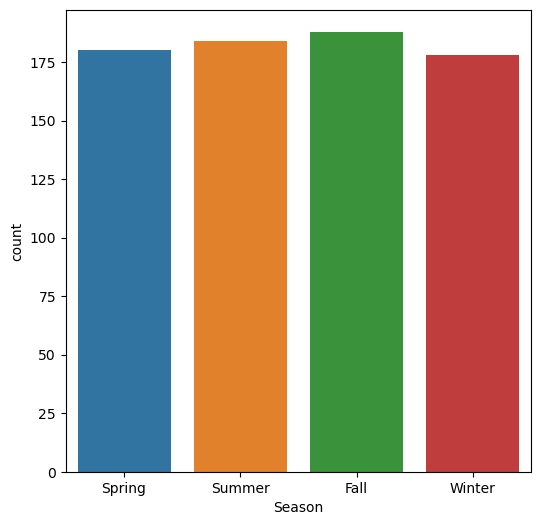

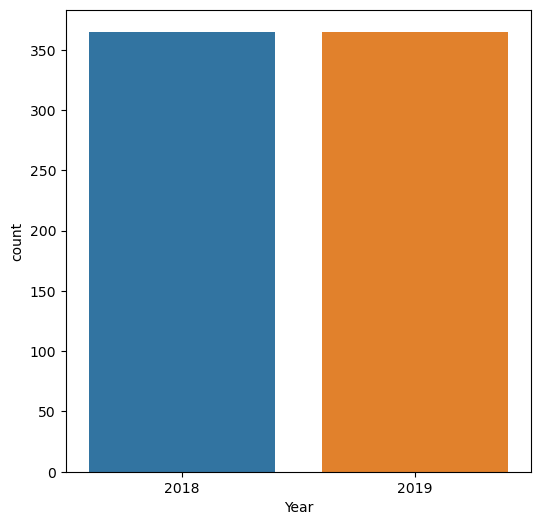

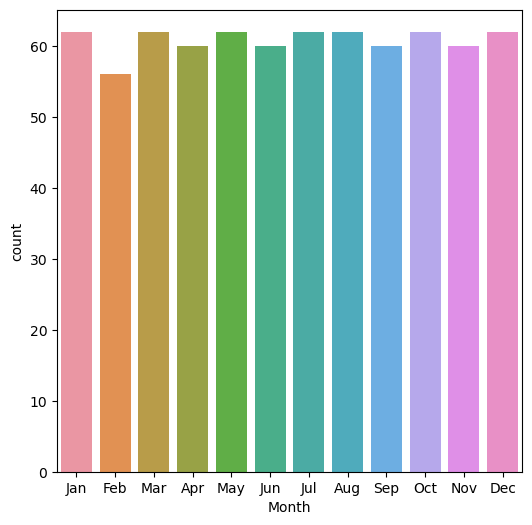

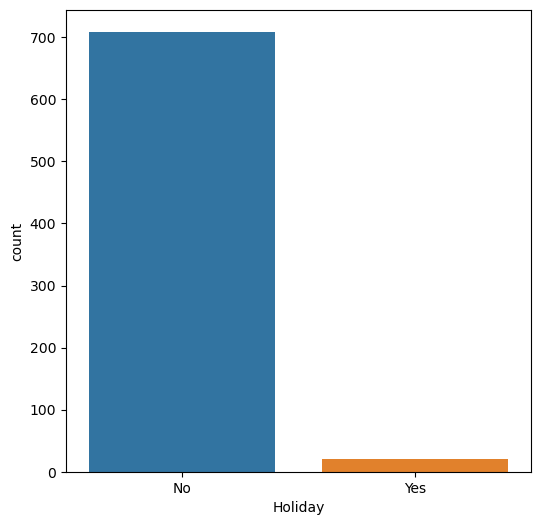

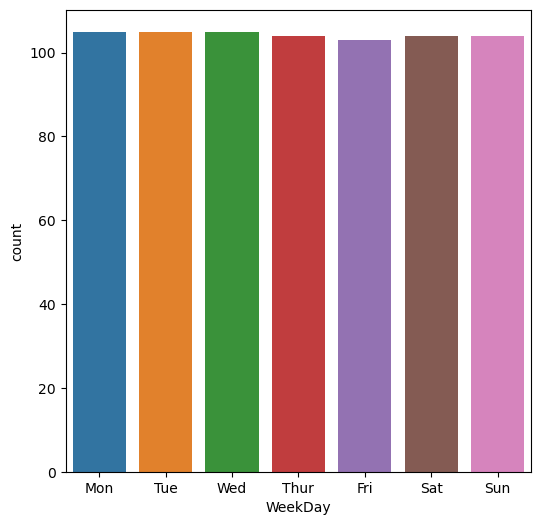

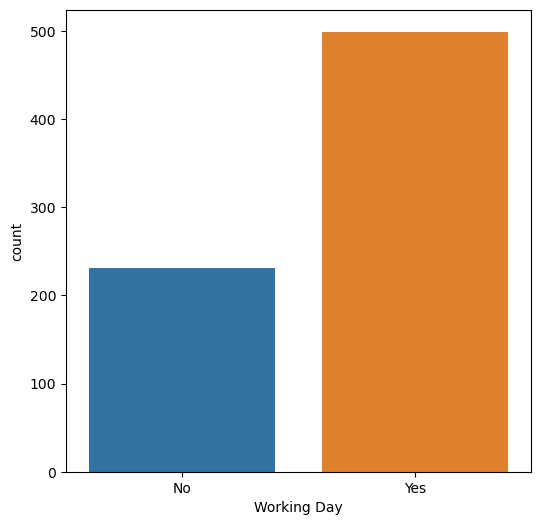

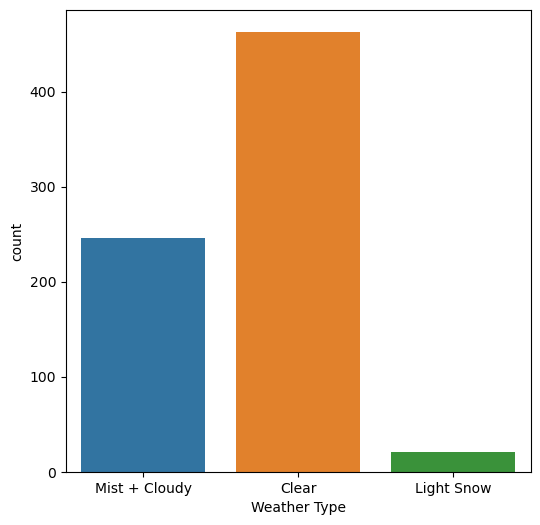

In [119]:

for i in range(len(categorical_columns)):
    plt.figure(figsize=[6,6])
    pltAxes = sns.countplot(data = bikesharing, x = categorical_columns[i])
    pltAxes.set_xlabel(categorical_xlabel[i])
    plt.show()

Bivariate analysis for categorical columns

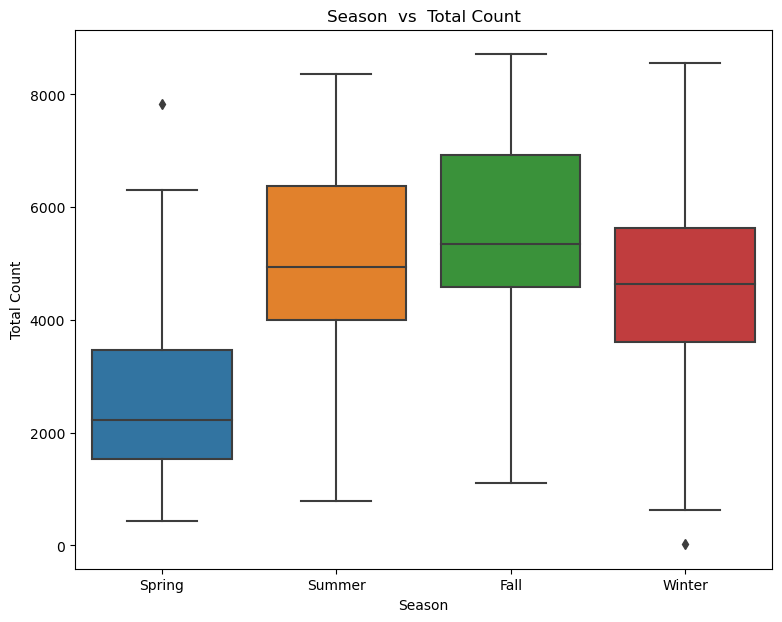

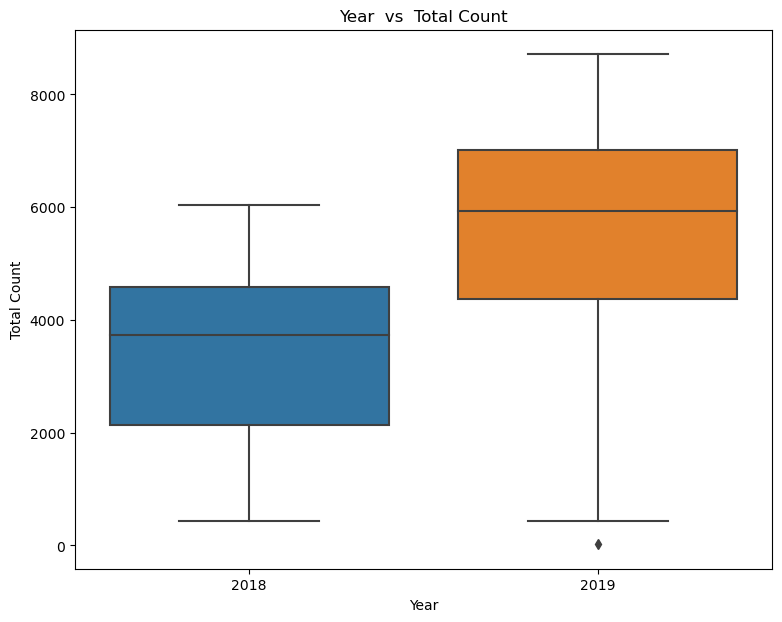

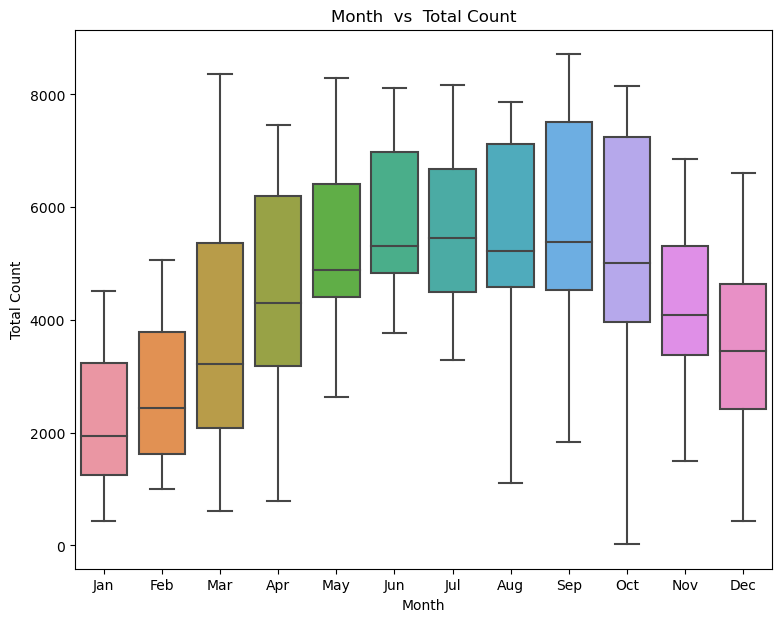

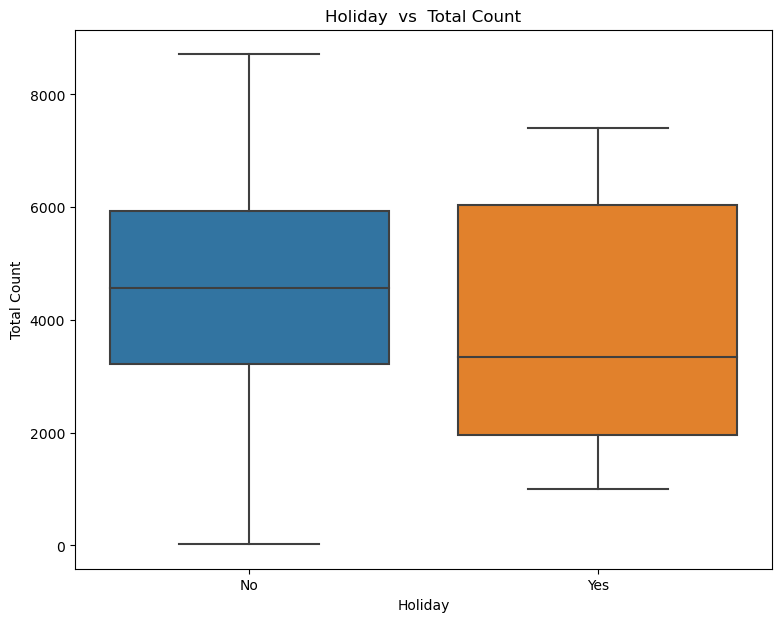

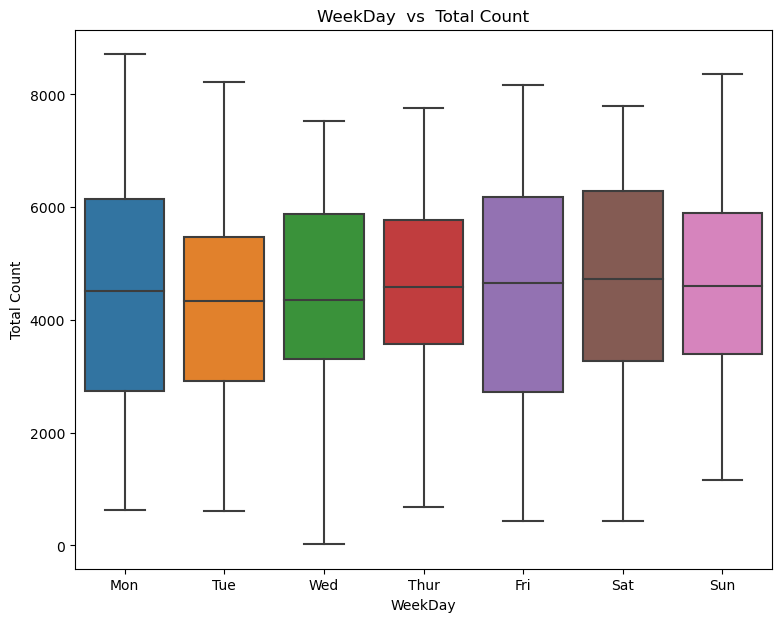

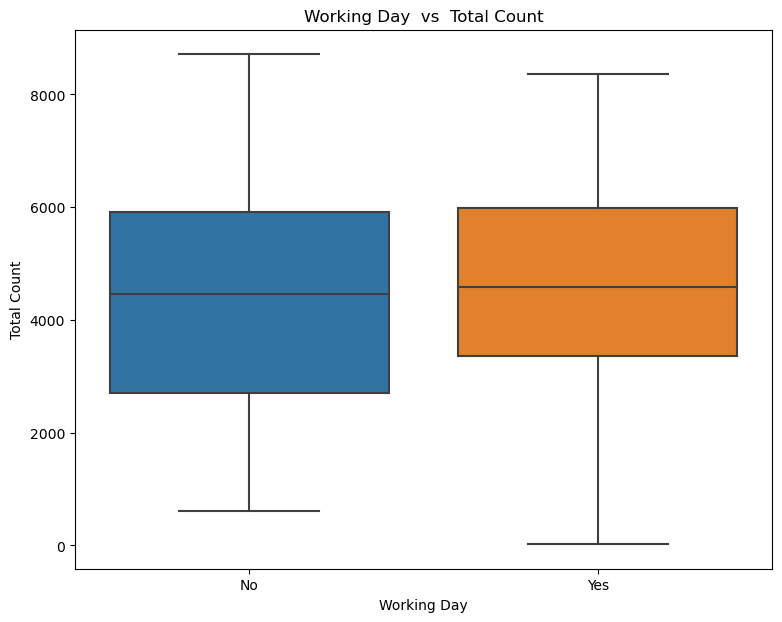

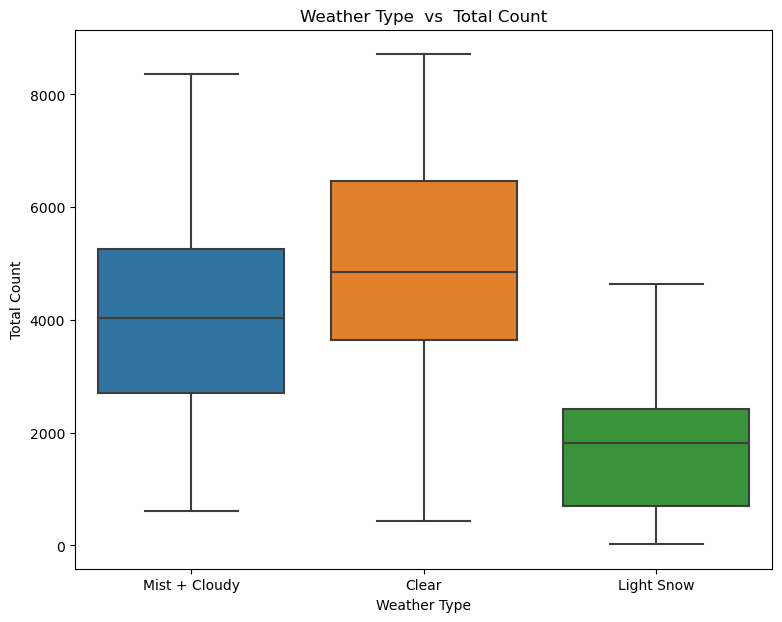

In [120]:
for i in range(len(categorical_columns)):
    plt.figure(figsize=[9,7])
    pltAxes = sns.boxplot(bikesharing,x=categorical_columns[i],y='cnt')
    pltAxes.set_xlabel(categorical_xlabel[i])
    pltAxes.set_ylabel('Total Count')
    pltAxes.set_title( categorical_xlabel[i] + '  vs  Total Count')
    plt.show()

When ever weather type is "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" there are no rentals of bike

Identify the numerical columns in the given data frame

In [121]:
numerical_coluns = ['temp', 'atemp', 'hum', 'windspeed','cnt']

Univariate analysis for numerical category

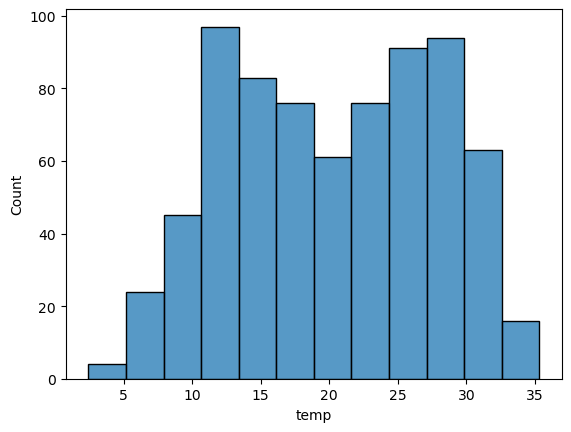

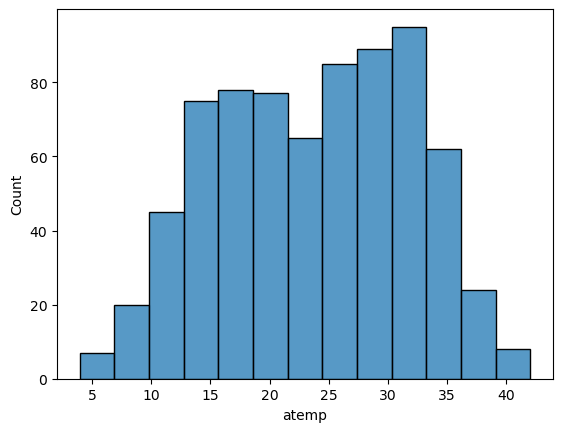

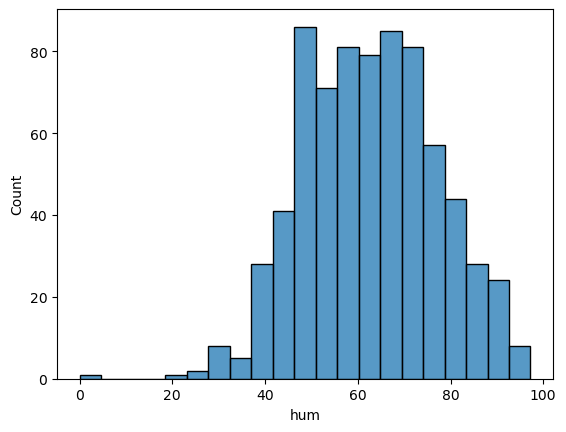

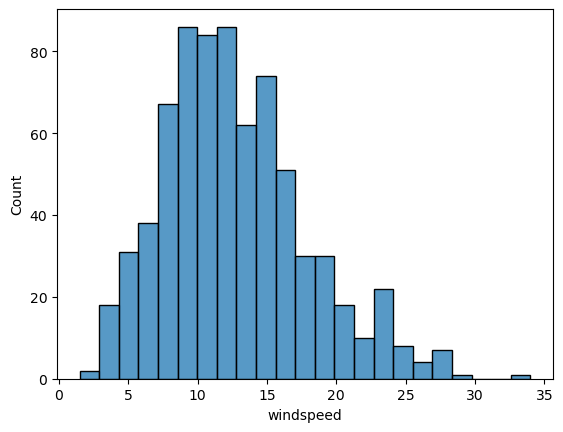

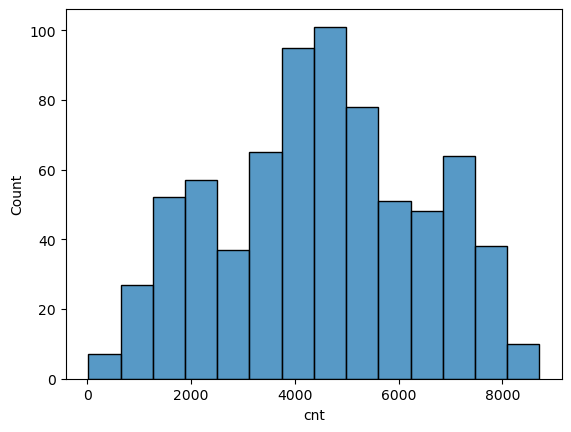

In [122]:
for colName in numerical_coluns:
    sns.histplot(bikesharing[colName])
    plt.show()

Bivariate analysis for numerical columns

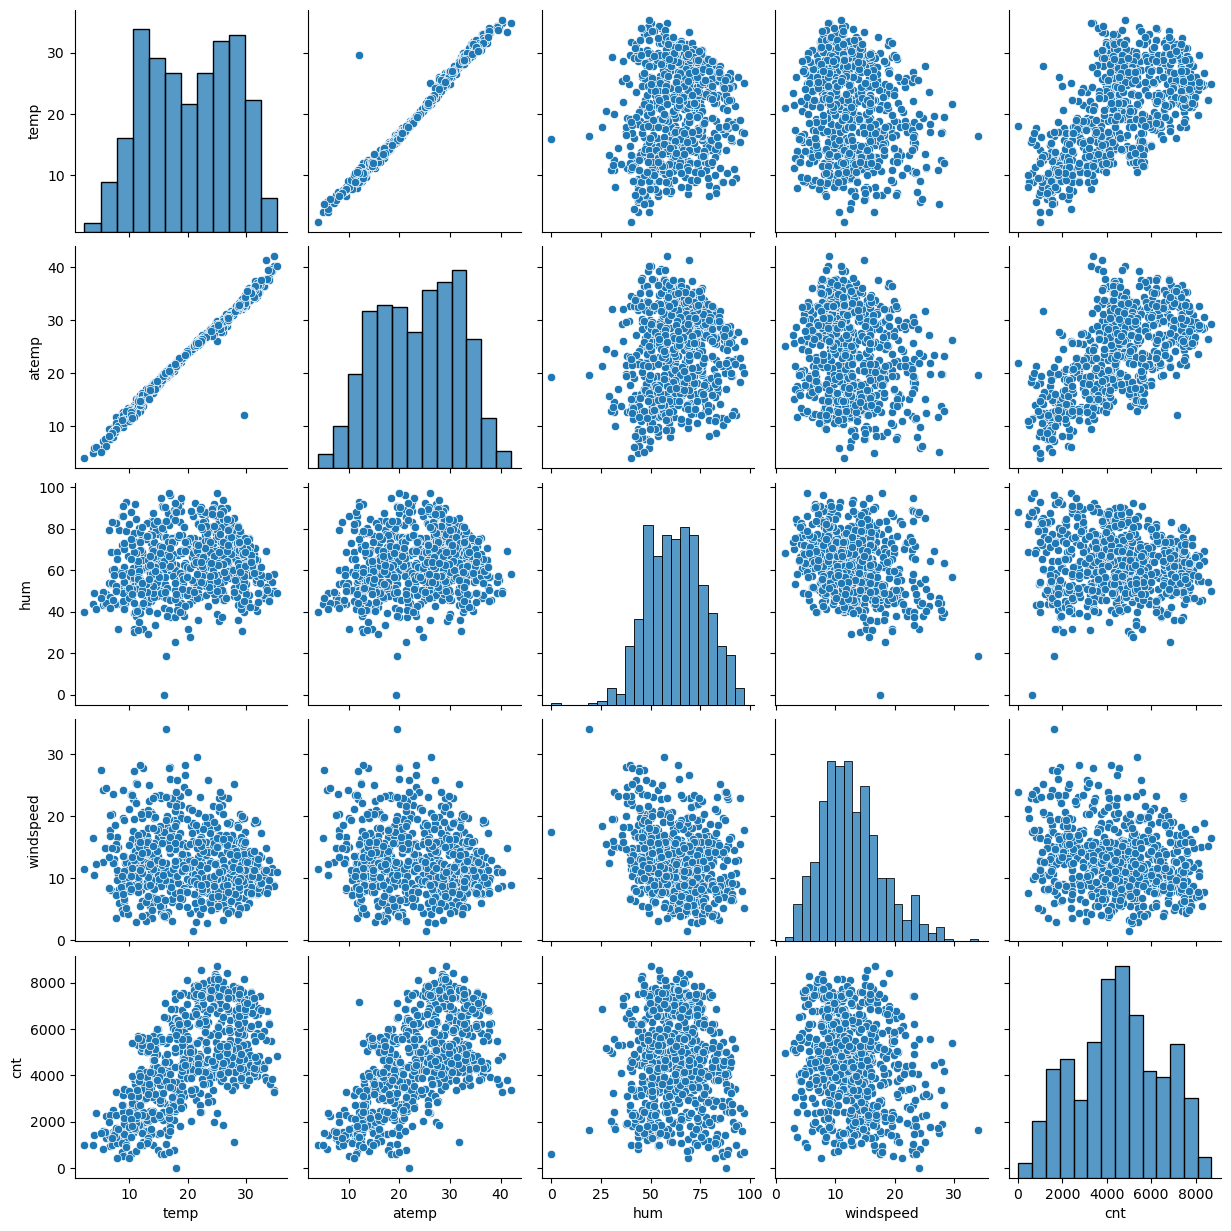

In [123]:
sns.pairplot(data=bikesharing, vars= numerical_coluns)
plt.show()

Heatmap for checking correlation between numerical columns

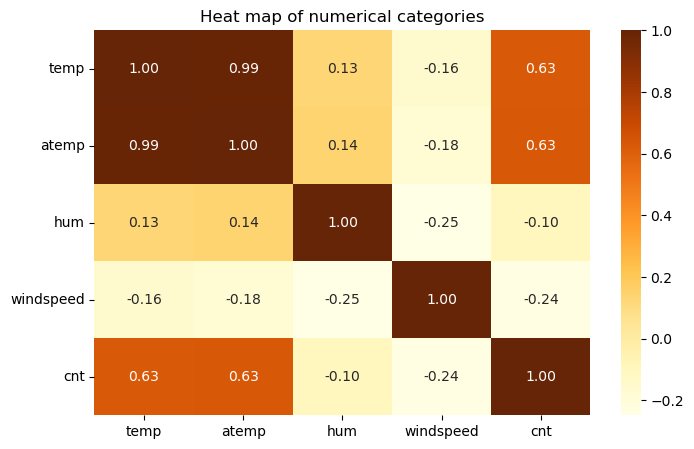

In [124]:
plt.figure(figsize=(8,5))
pltAxes = sns.heatmap(bikesharing[numerical_coluns].corr(method ='pearson'), annot=True, fmt=".2f", cmap="YlOrBr")
pltAxes.set_title('Heat map of numerical categories')
pltAxes.set_xticklabels(numerical_coluns)
pltAxes.set_yticklabels(numerical_coluns, rotation=0)
plt.show()